In [1]:
import os
from pathlib import Path
import git

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
CWD = os.getcwd()
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [2]:
points = [(1, -1), (4, 10), (0.2, 2), (10, 1), (1,1)]
labels = ['A', 'B', 'C', 'D', 'E']
num_points = len(points)

In [3]:
def visualize_prior_pdf(params, sample=[], log_scale = False, n_samples=1000, interval = None, debug=True, bw = 0.05, bw_log = 0.05, ax=None):
    """
    Visualize the gap between the empirical CDF/PDF and the Computed CDF/PDF.

    Args:
        sample (np.ndarray): Observed data.
        r (float): r value.
        eta (float): eta value.
        n_samples (int): Number of samples for the computed CDF/PDF.
        all_cdfs (dict): Dictionary containing computed CDFs.
        group (int or None): Group index (for titling purposes).

    Returns:
        distance (float): The Kolmogorov-Smirnov statistic.
        location (float): The location of the maximum deviation between the empirical and computed CDFs.
    """
    r, eta = params
    xs_pdf, null_cdf = compute_prior_cdf(r=r, eta=eta, n_samples=n_samples,  tail_bound=0.0001, enforce_assert=False, debug=debug, return_xs=True)
    null_pdf = null_cdf.derivative()(xs_pdf) 

    if log_scale:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # Empirical CDF vs Computed CDF
        ax1.set_xlim(left = -25, right = 25)
        if interval:
            ax1.set_xlim(left = interval[0], right = interval[1])
        ax1.plot(xs_pdf, null_pdf, label='Computed PDF')
        ax1.set_title(f'Prior (r={params[0]}, eta={params[1]})')
        ax1.set_title(f'Log Scale: Prior (r={params[0]}, eta={params[1]})')

        # Log Scale
        ax2.set_xlim(left = -25, right = 25)
        if interval:
            ax2.set_xlim(left = interval[0], right = interval[1])
        ax2.set_ylim(bottom = 10**-4, top=10)
        sns.kdeplot(ax = ax2, x = sample, bw_method = bw, log_scale=[False, True], label = f"Empirical PDF (KDE, bw={bw_log})")
        ax2.plot(xs_pdf, null_pdf, label = "Computed PDF")

        ax1.legend()
        ax2.legend()

        plt.tight_layout()
        plt.show()    
        
    else:
        fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

        # Empirical CDF vs Computed CDF
        ax1.set_xlim(left = -25, right = 25)
        if interval:
            ax1.set_xlim(left = interval[0], right = interval[1])
        ax1.plot(xs_pdf, null_pdf, label='Computed PDF')
        ax1.set_title(f'Prior (r={params[0]}, eta={params[1]})')
        #ax1.legend()
        plt.tight_layout()
        plt.show() 

    return fig

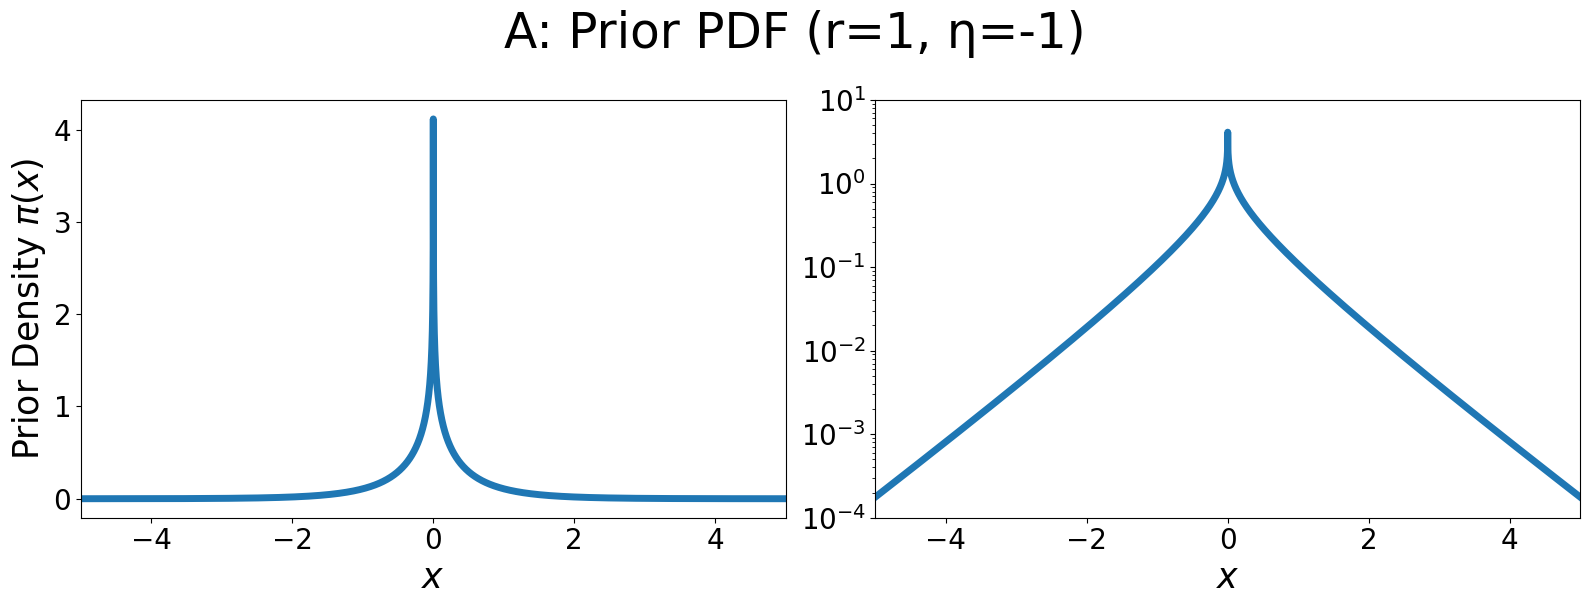

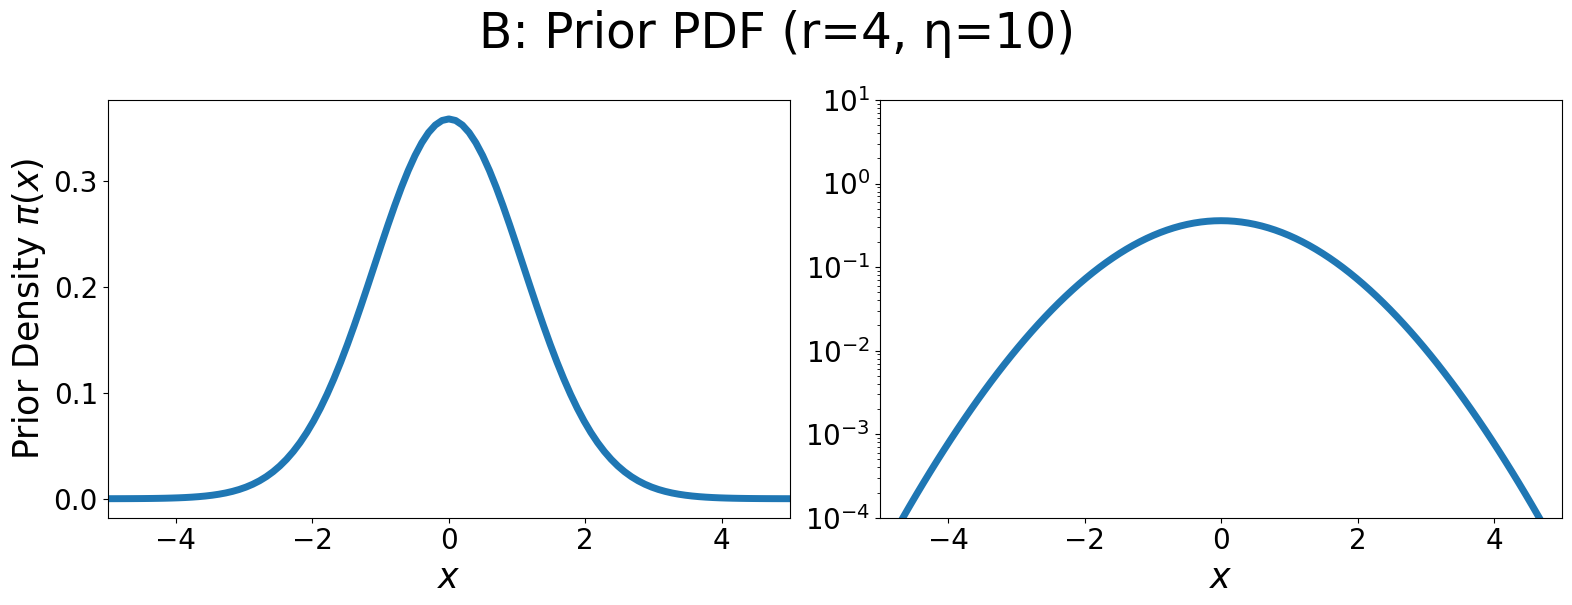

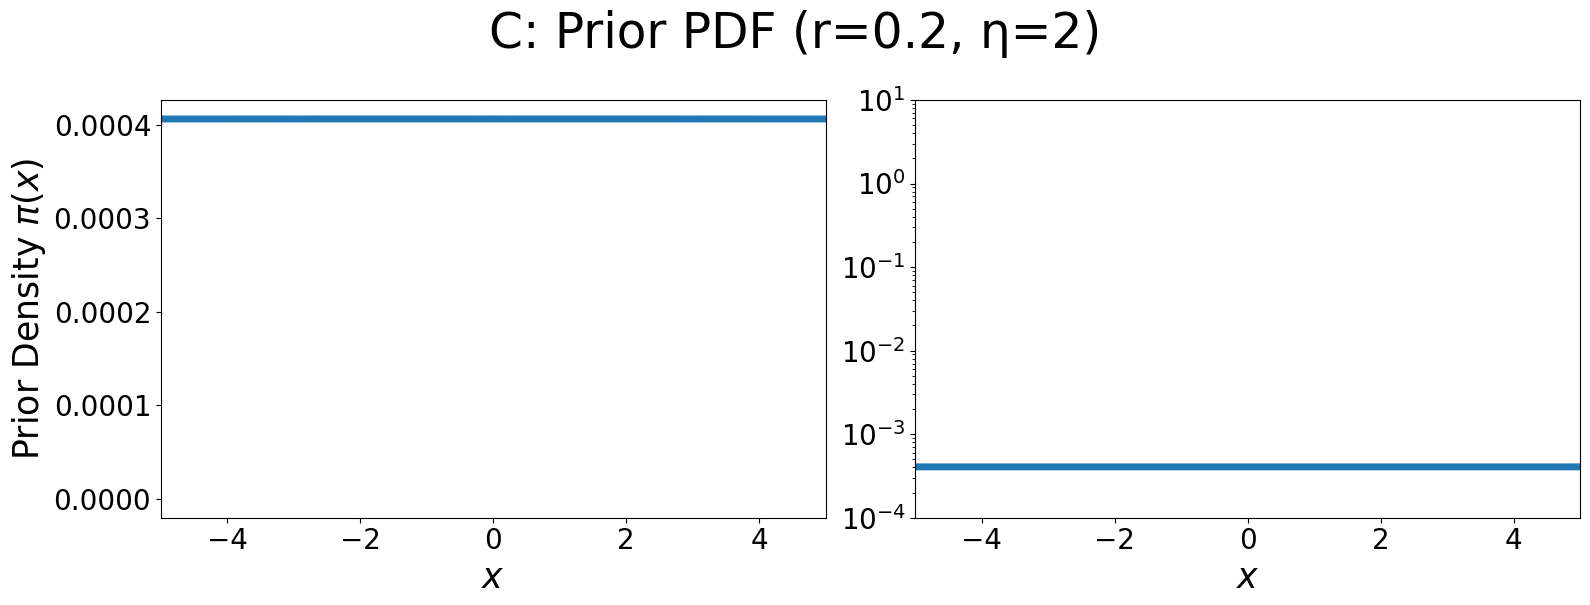

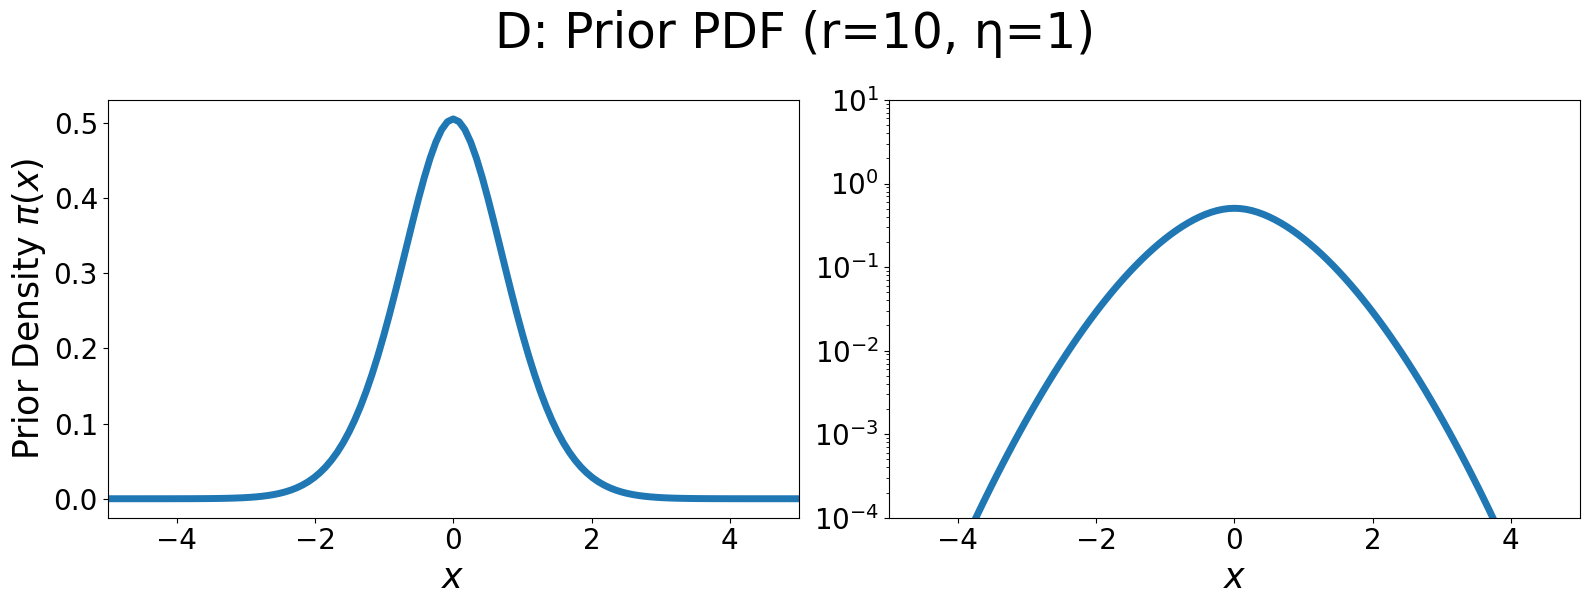

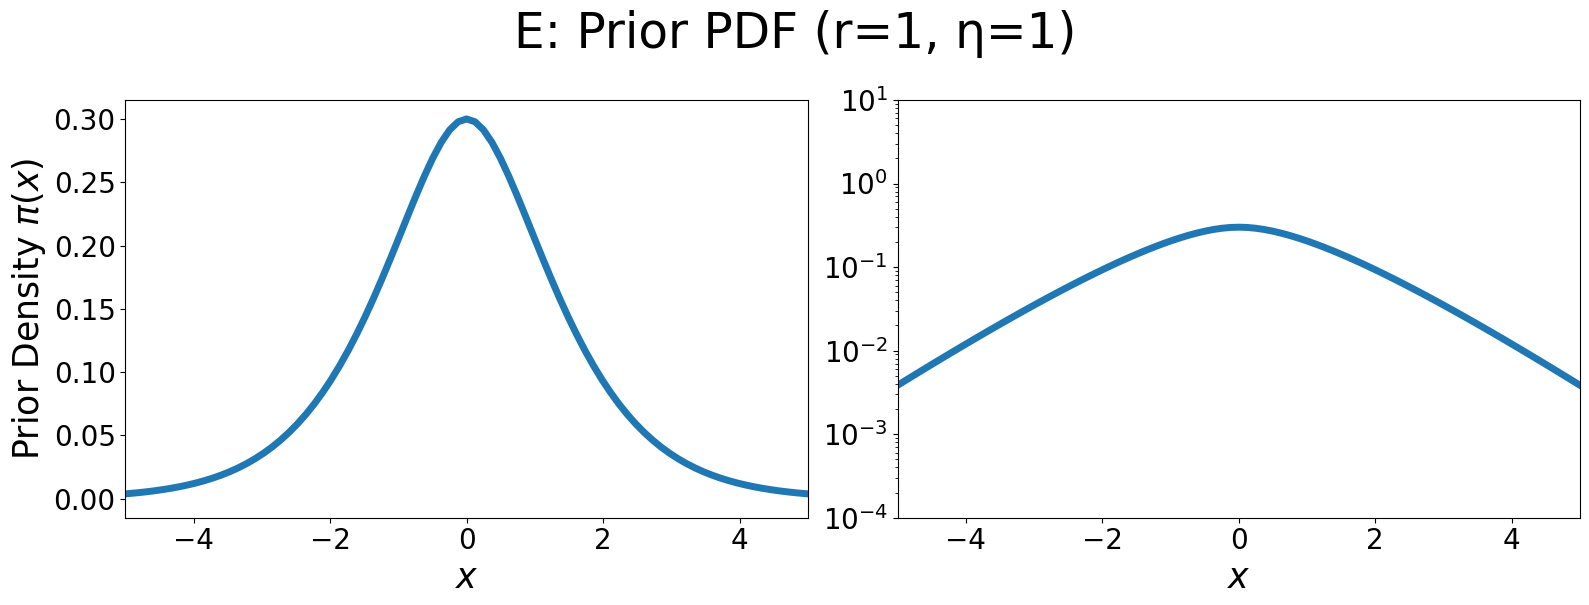

In [4]:
def visualize_prior(r, eta, show_log=True, interval=(0, 5), n_samples=1000, debug=False, title=""):
    """
    Visualize generalized gamma PDF, prior PDF, and optionally log prior PDF.
    
    Args:
        r (float): r parameter for generalized gamma
        eta (float): eta parameter for generalized gamma
        show_log (bool): Whether to show the log scale plot
        interval (tuple): x-axis limits (min, max)
        n_samples (int): Number of samples for computed PDF
        debug (bool): Debug flag for compute_prior_cdf
    
    Returns:
        matplotlib.figure.Figure: The generated figure
    """
    # Calculate number of subplots needed
    n_plots = 2 if show_log else 1
    
    # Create figure with appropriate number of subplots
    fig, axes = plt.subplots(1, n_plots, figsize=(8 * n_plots, 6))

    fig.suptitle(f'{title}Prior PDF (r={r}, η={eta})', fontsize=35, y=1)
    
    # Get prior PDF
    xs_prior, null_cdf = compute_prior_cdf(
        r=r, 
        eta=eta, 
        n_samples=n_samples,
        tail_bound=0.0001,
        enforce_assert=False,
        debug=debug,
        return_xs=True
    )
    null_pdf = null_cdf.derivative()(xs_prior)

    # Plot prior PDF
    axes[0].plot(xs_prior, null_pdf, label='Computed PDF', linewidth=linewidth)
    #axes[0].set_title(f'Prior (r={r}, η={eta})')
    axes[0].set_xlim(-interval[1], interval[1])
    axes[0].set_xlabel(r'$x$', fontsize=25)
    axes[0].set_ylabel(r'Prior Density $\pi(x)$', fontsize=25)
    axes[0].tick_params(axis='both', which='major', labelsize=20)
    
    # Plot log prior PDF if requested
    if show_log:
        axes[1].plot(xs_prior, null_pdf, label='Computed PDF', linewidth=linewidth)
        #axes[1].set_title(f'Log Scale: Prior (r={r}, η={eta})')
        axes[1].set_xlim(-interval[1], interval[1])
        axes[1].set_yscale('log')
        axes[1].set_ylim(bottom=10**-4, top=10)
        axes[1].set_xlabel(r'$x$', fontsize=25)
        axes[1].set_ylabel('', fontsize=25)
        axes[1].tick_params(axis='both', which='major', labelsize=20)
    
    plt.tight_layout()
    return fig

linewidth=5
for i in range(5):
    fig = visualize_prior(*points[i], show_log=True, n_samples=2000, title=f'{labels[i]}: ')
    r, eta = points[i]
    filename = f'../plots/prior_log_r{r}_eta{eta}.png'
    fig.savefig(filename, dpi=1000, bbox_inches='tight')
    
    plt.show()
    plt.close(fig) 

In [5]:
def visualize_distributions(r, eta, show_log=False, interval=(0, 5), n_samples=1000, debug=False, title=""):
    """
    Visualize generalized gamma PDF, prior PDF, and optionally log prior PDF.
    
    Args:
        r (float): r parameter for generalized gamma
        eta (float): eta parameter for generalized gamma
        show_log (bool): Whether to show the log scale plot
        interval (tuple): x-axis limits (min, max)
        n_samples (int): Number of samples for computed PDF
        debug (bool): Debug flag for compute_prior_cdf
    
    Returns:
        matplotlib.figure.Figure: The generated figure
    """
    # Calculate number of subplots needed
    n_plots = 3 if show_log else 2
    
    # Create figure with appropriate number of subplots
    fig, axes = plt.subplots(1, n_plots, figsize=(8 * n_plots, 6))
    
    # Generate x values for generalized gamma
    xs_gamma = np.linspace(0, 100, 100000)
    beta = (eta + 1.5)/r
    pdf_gamma = stats.gengamma.pdf(xs_gamma, a=beta, c=r)

    fig.suptitle(f'{title}Generalized Gamma PDF alongside Prior PDF (r={r}, η={eta})', fontsize=30, y=1)
    
    # Get prior PDF
    xs_prior, null_cdf = compute_prior_cdf(
        r=r, 
        eta=eta, 
        n_samples=n_samples,
        tail_bound=0.0001,
        enforce_assert=False,
        debug=debug,
        return_xs=True
    )
    null_pdf = null_cdf.derivative()(xs_prior)
    
    # Plot generalized gamma PDF
    axes[0].plot(xs_gamma, pdf_gamma)
    #axes[0].set_title(f'Generalized Gamma (r={r}, η={eta})')
    axes[0].set_xlim(interval)
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Density', fontsize=20)
    
    # Plot prior PDF
    axes[1].plot(xs_prior, null_pdf, label='Computed PDF')
    #axes[1].set_title(f'Prior (r={r}, η={eta})')
    axes[1].set_xlim(-interval[1], interval[1])
    axes[1].set_xlabel('Value')
    axes[1].set_ylabel('Density', fontsize=20)
    
    # Plot log prior PDF if requested
    if show_log:
        axes[2].plot(xs_prior, null_pdf, label='Computed PDF')
        #axes[2].set_title(f'Log Scale: Prior (r={r}, η={eta})')
        axes[2].set_xlim(-interval[1], interval[1])
        axes[2].set_yscale('log')
        axes[2].set_ylim(bottom=10**-4, top=10)
        axes[2].set_xlabel('Value')
        axes[2].set_ylabel('Log Density', fontsize=20)
    
    plt.tight_layout()
    return fig

# for i in range(5):
#     fig = visualize_distributions(*points[i], show_log=True, n_samples=200, title=f'{labels[i]}: ')
#     r, eta = points[i]
#     filename = f'gengamma_prior_log_r{r}_eta{eta}.png'
#     fig.savefig(filename, dpi=600, bbox_inches='tight')
    
#     plt.show()
#     plt.close(fig) 

In [6]:
# for i in range(num_points):
#     xs = np.linspace(0, 100, 100000)
#     r, eta = points[i]
#     beta = (eta + 1.5)/r 
    
#     pdf = stats.gengamma.pdf(xs, a = beta, c = r)
#     fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    
#     ax.plot(xs, pdf)
#     ax.set_title(f'{labels[i]}: Generalized Gamma (r={r}, η={eta})', fontsize=20)
#     ax.set_xlim(0, 2)

#     filename = f'gengamma_r{r}_eta{eta}.png'
#     fig.savefig(os.path.join("plots", filename), dpi=600, bbox_inches='tight')
    
#     plt.show()
#     plt.close(fig) 

C:\Users\yashd\AppData\Local\Temp\ipykernel_34544\2823815697.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)
c:\Users\yashd\.conda\envs\hbmv_backup2\Lib\site-packages\scipy\optimize\_optimize.py:2973: RuntimeWarning: invalid value encountered in scalar divide
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Users\yashd\AppData\Local\Temp\ipykernel_34544\2823815697.py:91: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ">k" (-> color='k'). The keyword argument will take precedence.
  ax.plot(1, 0.143, '>k', transform=ax.transAxes, clip_on=False, c ='blue')
C:\Users\yashd\AppData\Local\Temp\ipykernel_34544\2823815697.py:93: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k" (-> color='k'). The keyword argument will take precedence.
  ax.plot(0.112, 1, '^k', transform=ax.transAxes, clip_on=False

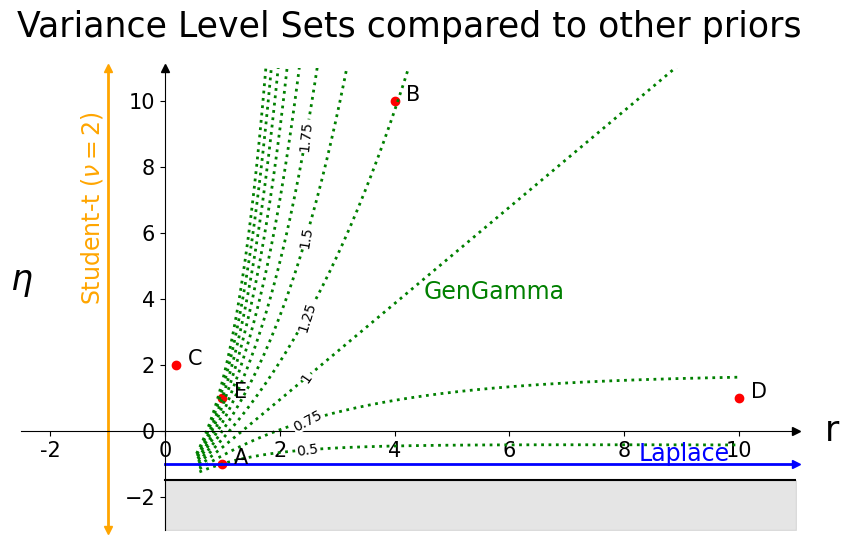

In [7]:
def gen_gamma_mean(r, eta):
    return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)

def find_eta_for_target_var(r, target_var):
    def objective(eta):
        return (gen_gamma_mean(r, eta) - target_var)**2
    result = scipy.optimize.minimize_scalar(objective)
    return result.x

def get_level_set(target_var, k=50):
    r_vals, eta_vals = [], []
    for r in np.linspace(0.01, 10, 1000):
        eta = find_eta_for_target_var(r, target_var)
        r_vals.append(r)
        eta_vals.append(eta)
    return r_vals[k:], eta_vals[k:]

x_left, x_right = -2.5, 11
y_down, y_up = -3, 11
fontmult = 1
fontadd = 5
linewidth=2

fig, ax = plt.subplots(figsize=(10, 6))

# Add shaded region for eta <= 1.5, r > 0
x_shade = np.array([0, x_right])
y_shade = np.array([-1.5, -1.5])
ax.fill_between(x_shade, y_down, y_shade, color='grey', alpha=0.2)
ax.plot(x_shade, y_shade, 'k-', linewidth=1.5)

# Plot level sets
target_vars = [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]
for target_var in target_vars:
    r_vals, eta_vals = get_level_set(target_var, k=60 - int(2*target_var))
    
    # Calculate break point for the line
    mid_idx = len(r_vals) // 5
    break_start = mid_idx - int(5/target_var)
    break_end = mid_idx + int(5/target_var)
    
    # Plot the line in segments to create a break
    ax.plot(r_vals[:break_start], eta_vals[:break_start], linestyle='dotted', c='green', linewidth=linewidth)
    ax.plot(r_vals[break_end:], eta_vals[break_end:], linestyle='dotted', c='green', linewidth=linewidth)
    
    # Calculate angle for text alignment
    if mid_idx + 1 < len(r_vals):
        dx = r_vals[mid_idx + 1] - r_vals[mid_idx]
        dy = eta_vals[mid_idx + 1] - eta_vals[mid_idx]
        angle = np.degrees(np.arctan2(dy, dx))
    else:
        angle = 0
    
    # Add label with white background
    ax.annotate(f'{target_var}', 
                (r_vals[mid_idx], eta_vals[mid_idx]),
                xytext=(0, 0), textcoords='offset points',
                fontsize=10, rotation=angle,
                va='center', ha='center',
                bbox=dict(facecolor='white', edgecolor='none', pad=0.5))

# Add Student-t and Laplace lines with direct labels
ax.axvline(-1, color='orange', linewidth=linewidth, label = 'Student t')
ax.axhline(-1, xmin=np.abs(x_left/(x_right - x_left)), xmax=1, color='blue', linewidth=linewidth, label = 'Laplace')

# Add direct labels on the plot
ax.text(8.25, -0.9, 'Laplace', color='blue', fontsize=fontmult*12+fontadd)
ax.text(-1.5, 4, r'Student-t ($\nu=2$)', color='orange', fontsize=fontmult*12+fontadd, rotation=90)
ax.text(4.5, 4, 'GenGamma', color='green', fontsize=fontmult*12+fontadd, rotation=0)

# Add arrows to axes
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# Fix origin tick mark to show only once
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.yaxis.set_label_coords(0, 1.02)

# Set axes labels with LaTeX
ax.text(x_right + 0.5, 0, 'r', ha='left', va='center', fontsize=fontmult*20+fontadd)
ax.set_ylabel(r'$\eta$', rotation=0, fontsize=fontmult*20+fontadd)

ax.plot(1, 0.215, '>k', transform=ax.transAxes, clip_on=False)
ax.plot(0.185, 1, '^k', transform=ax.transAxes, clip_on=False)

ax.plot(1, 0.143, '>k', transform=ax.transAxes, clip_on=False, c ='blue')

ax.plot(0.112, 1, '^k', transform=ax.transAxes, clip_on=False, c ='orange')
ax.plot(0.112, 0, 'vk', transform=ax.transAxes, clip_on=False, c ='orange')

# Plot and label points
for (x, y), label in zip(points, labels):
    ax.scatter(x, y, color='red')
    ax.text(x + 0.2, y, label, color='black', fontsize=fontmult*10+fontadd)

# Customize the plot
ax.set_xlim(x_left, x_right)
ax.set_ylim(y_down, y_up)
ax.set_title('Variance Level Sets compared to other priors', y = 1.05, fontsize=fontmult*20+fontadd)

# Ensure only one '0' shows at origin
ax.set_xticklabels([''] + [str(int(x)) for x in ax.get_xticks()[1:]])
#plt.legend()

filename = f'compare_priors_schematic.png'
fig.savefig(os.path.join("..", "plots", filename), dpi=1000, bbox_inches='tight')

plt.show()

